<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Top-4-charts" data-toc-modified-id="Top-4-charts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Top 4 charts</a></span><ul class="toc-item"><li><span><a href="#Geospatial-Analysis" data-toc-modified-id="Geospatial-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Geospatial Analysis</a></span><ul class="toc-item"><li><span><a href="#Listings" data-toc-modified-id="Listings-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Listings</a></span></li></ul></li><li><span><a href="#Occupancy-rate-by-Price-range-and-Review-rating" data-toc-modified-id="Occupancy-rate-by-Price-range-and-Review-rating-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Occupancy rate by Price range and Review rating</a></span><ul class="toc-item"><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Interpretation</a></span></li><li><span><a href="#Comments-on-the-visualisation" data-toc-modified-id="Comments-on-the-visualisation-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Comments on the visualisation</a></span></li></ul></li><li><span><a href="#Scores-by-Price-range" data-toc-modified-id="Scores-by-Price-range-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scores by Price range</a></span><ul class="toc-item"><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Interpretation</a></span></li><li><span><a href="#Comments-on-the-visualisation" data-toc-modified-id="Comments-on-the-visualisation-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Comments on the visualisation</a></span></li></ul></li><li><span><a href="#Occupancy-Rate-vs-Tenures-by-Price-range" data-toc-modified-id="Occupancy-Rate-vs-Tenures-by-Price-range-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Occupancy Rate vs Tenures by Price range</a></span><ul class="toc-item"><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Interpretation</a></span></li><li><span><a href="#Comments-on-the-visualisation" data-toc-modified-id="Comments-on-the-visualisation-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Comments on the visualisation</a></span></li></ul></li></ul></li></ul></div>

## Top 4 charts

### Geospatial Analysis

In [13]:
import folium 
from folium import plugins
from folium.plugins import HeatMap
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import branca.colormap as branca_folium_cm
from branca.element import Template
import json
import h3
from shapely.geometry import Polygon
from branca.utilities import color_brewer

In [14]:
GEO_JSON = "data/neighbourhoods.geojson"

#### Listings

**NB:** All the maps below include multiple layers to allow the users to select what to see (control at the bottom left of the map). The idea is to avoid visual clutter but still be able to present the information to the user on request. The interactive maps have been uploaded to OneDrive, the notebook only contains screenshot of them. Please refer to the README file for details.

In [15]:
touristic_poi = {
    "Statue of Liberty" : [40.689247,-74.044502],
    "Staten Island Ferry" : [40.6441, -74.0725],
    "Empire State Building" : [40.748817,-73.985428],
    "Metropolitan Museum" : [40.778965,-73.985428],
    "Midtown Manhattan" : [40.754932,-73.984016],
    "Grand Central Terminal" : [40.752655, -73.977295],
    "Central Park" : [40.785091, -73.968285],
    "Rockefeller Center" : [40.758740, -73.978674],
    "Brooklyn Bridge" : [40.706001, -73.997002],
    "Theater District" : [40.758896, -73.985130],
    "Times Square" : [40.758896, -73.985130],
    "World Trade Center" : [40.712742, -74.013382],
    "Greenwich Village" : [40.730522, -74.002205],
    "Madison Square Garden" : [40.750298, -73.993324],
    "Chelsea Market" : [40.742352, -74.006210],
    "Carnegie Hall" : [40.764988, -73.979897],
    "Little Italy" : [40.719330, -73.997307],
    "Manhattan Bridge" : [40.707496, -73.990774],
    "Meatpacking District" : [40.7410, -74.0076],
    "Guggenheim Museum" : [40.782978, -73.959030],
}

In [16]:
# full_listings = pd.read_csv("data/listings.csv")
full_listings = pd.read_pickle("listings_clean.pkl")

##### Prices

On this map we represent information associated to each neighbourhood. We show the average price per square foot as well as the average Price / night on Airbnb.

In [17]:
square_ft_price = pd.read_csv("data/nyc_sales_price.csv")
square_ft_price.head()

,neighbourhood_group,neighbourhood,ppsqft
0,bronx,allerton,221.452541
1,staten island,arden heights,270.429339
2,staten island,arrochar,295.327981
3,staten island,arrochar,329.320153
4,queens,arverne,199.054519


In [18]:
prices = full_listings[["id", "neighbourhood_cleansed", "latitude", "longitude", "price"]].rename(
    columns={"neighbourhood_cleansed": "neighbourhood"}
)
prices["neighbourhood_lower"] = prices["neighbourhood"].str.lower()

In [19]:
prices = prices.merge(
    square_ft_price, how="left", 
    left_on="neighbourhood_lower", right_on="neighbourhood", suffixes=('', '_y')
)[[
    "neighbourhood",
    "latitude",
    "longitude",
    "price",
    "ppsqft",
    "id"
]]

In [20]:
prices.head()

,neighbourhood,latitude,longitude,price,ppsqft,id
0,Washington Heights,40.85722,-73.93790,100.0,742.921608,2060
1,Midtown,40.75362,-73.98377,225.0,1363.227281,2595
2,Midtown,40.75362,-73.98377,225.0,468.630752,2595
3,Midtown,40.75362,-73.98377,225.0,1972.276067,2595
4,Clinton Hill,40.68514,-73.95976,89.0,3080.726175,3831


In [21]:
nbgh_prices = prices.groupby("neighbourhood").agg({
    "latitude": "mean",
    "longitude": "mean",
    "price": "mean",
    "ppsqft": "mean",
    "id": "count",
}).reset_index()

In [22]:
nbgh_prices.head()

,neighbourhood,latitude,longitude,price,ppsqft,id
0,Allerton,40.864480,-73.859181,107.342105,221.452541,38
1,Arden Heights,40.549610,-74.174875,108.500000,270.429339,4
2,Arrochar,40.593956,-74.073729,106.500000,312.324067,36
3,Arverne,40.592085,-73.795199,190.918033,199.054519,61
4,Astoria,40.764246,-73.919912,101.254386,552.383916,684


In [23]:
nbgh_prices["count_bucket"] = pd.cut(
    nbgh_prices["id"], 
    bins=[-0.01, 10, 100, 250, 750, 1000, 1000000], 
    labels=[
        "  0-10  ",
        " 10-100 ",
        "100-250 ",
        "250-750 ",
        "750-1000",
        "  1000+ ",
    ]
)
nbgh_prices["count_bucket_idx"] = nbgh_prices["count_bucket"].cat.codes + 2

###### Custom Map legend

Unfortunately we had to write our own legend in HTML and CSS to overcome the limitation of the library used.

**!! Sorry for the long text !!**

In [24]:
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 5px 0px; left: 20px; top: 20px; width: 350px;'>
     
<svg id="legend1" width="450" height="40"><g class="key" transform="translate(25,16) scale(0.75)"><rect height="10" x="0" width="0" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="0" width="0.8016032064128251" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="0.8016032064128251" width="0.8016032064128251" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="1.6032064128256502" width="0.8016032064128251" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="2.4048096192384754" width="0.8016032064128296" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="3.206412825651305" width="0.8016032064128202" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="4.008016032064125" width="0.80160320641283" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="4.809619238476955" width="0.8016032064128256" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="5.611222444889781" width="0.8016032064128256" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="6.412825651302606" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="7.214428857715431" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="8.016032064128256" width="0.8016032064128265" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="8.817635270541082" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="9.619238476953907" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="10.420841683366735" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="11.222444889779556" width="0.8016032064128318" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="12.024048096192388" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="12.825651302605213" width="0.8016032064128229" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="13.627254509018035" width="0.8016032064128265" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="14.428857715430862" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="15.230460921843687" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="16.03206412825651" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="16.833667334669336" width="0.8016032064128318" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="17.635270541082168" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="18.436873747494992" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="19.238476953907817" width="0.8016032064128176" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="20.040080160320635" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="20.84168336673347" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="21.6432865731463" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="22.44488977955912" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="23.24649298597194" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="24.04809619238477" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="24.849699398797597" width="0.8016032064128318" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="25.65130260521043" width="0.8016032064128105" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="26.45290581162324" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="27.254509018036067" width="0.8016032064128318" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="28.0561122244489" width="0.8016032064128318" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="28.85771543086173" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="29.659318637274552" width="0.8016032064128247" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="30.460921843687377" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="31.262525050100198" width="0.8016032064128318" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="32.06412825651303" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="32.86573146292585" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="33.66733466933867" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="34.4689378757515" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="35.27054108216433" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="36.07214428857716" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="36.87374749498999" width="0.8016032064128069" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="37.6753507014028" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="38.476953907815634" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="39.278557114228455" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="40.080160320641276" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="40.88176352705411" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="41.68336673346693" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="42.48496993987976" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="43.28657314629258" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="44.08817635270542" width="0.8016032064128069" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="44.889779559118224" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="45.69138276553106" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="46.49298597194388" width="0.801603206412814" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="47.294589178356695" width="0.8016032064128567" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="48.09619238476955" width="0.8016032064128069" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="48.89779559118236" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="49.69939879759519" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="50.50100200400801" width="0.8016032064128424" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="51.30260521042085" width="0.8016032064127998" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="52.10420841683365" width="0.8016032064128424" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="52.90581162324649" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="53.707414829659314" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="54.509018036072135" width="0.8016032064128495" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="55.310621242484984" width="0.8016032064127998" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="56.112224448897784" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="56.91382765531062" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="57.71543086172345" width="0.8016032064128069" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="58.517034068136255" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="59.31863727454909" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="60.12024048096192" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="60.921843687374746" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="61.72344689378758" width="0.8016032064128282" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="62.52505010020041" width="0.801603206412814" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="63.326653306613224" width="0.8016032064128211" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="64.12825651302605" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="64.92985971943888" width="0.8016032064128069" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="65.73146292585169" width="0.8016032064128353" style="fill: rgb(241, 238, 246);"></rect><rect height="10" x="66.53306613226452" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="67.33466933867734" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="68.13627254509018" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="68.93787575150301" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="69.73947895791582" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="70.54108216432866" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="71.34268537074148" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="72.14428857715431" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="72.94589178356712" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="73.74749498997997" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="74.54909819639278" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="75.35070140280561" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="76.15230460921843" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="76.95390781563125" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="77.75551102204408" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="78.55711422845691" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="79.35871743486975" width="0.8016032064127927" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="80.16032064128254" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="80.96192384769539" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="81.76352705410821" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="82.56513026052103" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="83.36673346693388" width="0.8016032064127927" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="84.16833667334667" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="84.96993987975952" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="85.77154308617234" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="86.57314629258516" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="87.374749498998" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="88.17635270541084" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="88.97795591182364" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="89.77955911823648" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="90.5811623246493" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="91.38276553106212" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="92.18436873747494" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="92.98597194388776" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="93.78757515030061" width="0.8016032064127927" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="94.5891783567134" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="95.39078156312625" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="96.1923847695391" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="96.99398797595192" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="97.79559118236473" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="98.59719438877757" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="99.39879759519039" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="100.2004008016032" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="101.00200400801602" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="101.80360721442887" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="102.6052104208417" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="103.40681362725451" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="104.20841683366733" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="105.01002004008015" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="105.81162324649299" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="106.6132264529058" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="107.41482965931863" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="108.21643286573146" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="109.01803607214427" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="109.81963927855712" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="110.62124248496997" width="0.8016032064127927" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="111.42284569138276" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="112.2244488977956" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="113.02605210420842" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="113.82765531062124" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="114.62925851703407" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="115.4308617234469" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="116.23246492985973" width="0.8016032064127927" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="117.03406813627252" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="117.83567134268536" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="118.63727454909821" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="119.43887775551103" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="120.24048096192384" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="121.04208416833666" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="121.8436873747495" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="122.64529058116234" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="123.44689378757516" width="0.8016032064128211" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="124.24849699398798" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="125.05010020040082" width="0.8016032064127927" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="125.85170340681361" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="126.65330661322645" width="0.8016032064128495" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="127.4549098196393" width="0.8016032064127927" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="128.2565130260521" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="129.05811623246493" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="129.85971943887776" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="130.66132264529057" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="131.4629258517034" width="0.8016032064128353" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="132.26452905811624" width="0.8016032064128069" style="fill: rgb(212, 185, 218);"></rect><rect height="10" x="133.06613226452905" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="133.86773547094185" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="134.6693386773547" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="135.47094188376752" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="136.2725450901804" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="137.0741482965932" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="137.87575150300603" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="138.67735470941884" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="139.47895791583164" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="140.2805611222445" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="141.0821643286573" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="141.88376753507015" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="142.68537074148296" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="143.4869739478958" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="144.28857715430863" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="145.09018036072143" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="145.89178356713427" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="146.69338677354708" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="147.49498997995994" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="148.29659318637275" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="149.09819639278558" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="149.89979959919842" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="150.70140280561122" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="151.50300601202403" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="152.30460921843687" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="153.1062124248497" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="153.9078156312625" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="154.70941883767534" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="155.51102204408815" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="156.312625250501" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="157.11422845691382" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="157.91583166332663" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="158.7174348697395" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="159.5190380761523" width="0.8016032064127785" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="160.32064128256508" width="0.8016032064128922" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="161.12224448897797" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="161.92384769539078" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="162.7254509018036" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="163.52705410821642" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="164.32865731462925" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="165.13026052104206" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="165.9318637274549" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="166.73346693386776" width="0.8016032064127785" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="167.53507014028054" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="168.33667334669335" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="169.1382765531062" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="169.93987975951904" width="0.8016032064127785" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="170.74148296593182" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="171.5430861723447" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="172.3446893787575" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="173.14629258517033" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="173.9478957915832" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="174.749498997996" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="175.5511022044088" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="176.35270541082167" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="177.15430861723448" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="177.95591182364728" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="178.75751503006012" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="179.55911823647295" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="180.36072144288576" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="181.1623246492986" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="181.9639278557114" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="182.76553106212424" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="183.56713426853707" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="184.36873747494988" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="185.17034068136275" width="0.8016032064127785" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="185.97194388777552" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="186.77354709418836" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="187.57515030060122" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="188.37675350701403" width="0.8016032064127785" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="189.1783567134268" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="189.97995991983967" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="190.7815631262525" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="191.58316633266531" width="0.8016032064128922" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="192.3847695390782" width="0.8016032064127785" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="193.18637274549098" width="0.8016032064128638" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="193.98797595190385" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="194.78957915831666" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="195.59118236472946" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="196.3927855711423" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="197.19438877755513" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="197.99599198396794" width="0.8016032064128353" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="198.79759519038078" width="0.8016032064128069" style="fill: rgb(201, 148, 199);"></rect><rect height="10" x="199.59919839679358" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="200.4008016032064" width="0.8016032064128638" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="201.20240480961925" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="202.00400801603203" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="202.80561122244487" width="0.8016032064128638" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="203.60721442885773" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="204.4088176352705" width="0.8016032064128922" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="205.2104208416834" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="206.01202404809618" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="206.81362725450902" width="0.8016032064128638" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="207.61523046092188" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="208.41683366733466" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="209.2184368737475" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="210.0200400801603" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="210.82164328657313" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="211.62324649298597" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="212.42484969939878" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="213.2264529058116" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="214.0280561122244" width="0.8016032064128638" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="214.82965931863725" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="215.6312625250501" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="216.43286573146293" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="217.23446893787576" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="218.03607214428854" width="0.8016032064128922" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="218.83767535070143" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="219.63927855711424" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="220.44088176352705" width="0.8016032064128922" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="221.24248496993994" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="222.04408817635272" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="222.84569138276552" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="223.64729458917836" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="224.4488977955912" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="225.250501002004" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="226.05210420841684" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="226.85370741482967" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="227.65531062124248" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="228.4569138276553" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="229.25851703406815" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="230.06012024048096" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="230.8617234468938" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="231.66332665330657" width="0.8016032064128922" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="232.46492985971946" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="233.26653306613227" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="234.06813627254505" width="0.8016032064128922" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="234.86973947895794" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="235.67134268537072" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="236.47294589178352" width="0.8016032064128922" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="237.27454909819642" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="238.0761523046092" width="0.8016032064128638" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="238.87775551102206" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="239.67935871743484" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="240.48096192384767" width="0.8016032064128638" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="241.28256513026054" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="242.08416833667332" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="242.88577154308615" width="0.8016032064128638" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="243.687374749499" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="244.48897795591185" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="245.29058116232468" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="246.0921843687375" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="246.89378757515033" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="247.6953907815631" width="0.8016032064128638" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="248.49699398797597" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="249.29859719438875" width="0.8016032064128922" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="250.10020040080164" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="250.90180360721445" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="251.70340681362723" width="0.8016032064128922" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="252.50501002004012" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="253.3066132264529" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="254.10821643286573" width="0.8016032064128638" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="254.9098196392786" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="255.71142284569137" width="0.8016032064128069" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="256.5130260521042" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="257.314629258517" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="258.11623246492985" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="258.9178356713427" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="259.7194388777555" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="260.52104208416836" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="261.32264529058114" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="262.12424849699397" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="262.9258517034068" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="263.72745490981964" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="264.5290581162325" width="0.8016032064127785" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="265.33066132264526" width="0.8016032064128353" style="fill: rgb(223, 101, 176);"></rect><rect height="10" x="266.1322645290581" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="266.9338677354709" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="267.7354709418837" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="268.5370741482966" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="269.3386773547094" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="270.14028056112227" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="270.94188376753505" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="271.7434869739479" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="272.5450901803608" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="273.34669338677355" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="274.1482965931864" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="274.9498997995992" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="275.75150300601206" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="276.55310621242484" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="277.3547094188377" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="278.1563126252505" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="278.9579158316633" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="279.7595190380762" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="280.561122244489" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="281.3627254509018" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="282.1643286573146" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="282.9659318637274" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="283.7675350701403" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="284.56913827655313" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="285.3707414829659" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="286.1723446893788" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="286.9739478957916" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="287.77555110220436" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="288.57715430861725" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="289.37875751503003" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="290.18036072144287" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="290.9819639278557" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="291.78356713426854" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="292.5851703406813" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="293.38677354709415" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="294.188376753507" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="294.9899799599199" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="295.7915831663327" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="296.5931863727455" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="297.3947895791583" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="298.19639278557116" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="298.99799599198394" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="299.79959919839683" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="300.6012024048096" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="301.40280561122245" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="302.2044088176353" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="303.00601202404806" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="303.80761523046095" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="304.60921843687373" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="305.41082164328657" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="306.21242484969946" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="307.01402805611224" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="307.8156312625251" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="308.61723446893785" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="309.4188376753507" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="310.2204408817635" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="311.02204408817636" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="311.8236472945892" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="312.625250501002" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="313.4268537074148" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="314.22845691382764" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="315.0300601202405" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="315.8316633266533" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="316.6332665330661" width="0.8016032064128922" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="317.434869739479" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="318.2364729458918" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="319.0380761523046" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="319.83967935871743" width="0.8016032064127216" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="320.64128256513015" width="0.801603206412949" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="321.4428857715431" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="322.24448897795594" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="323.0460921843687" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="323.84769539078155" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="324.6492985971944" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="325.4509018036072" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="326.25250501002" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="327.05410821643284" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="327.8557114228457" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="328.6573146292585" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="329.45891783567134" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="330.2605210420841" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="331.06212424849696" width="0.8016032064128353" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="331.8637274549098" width="0.8016032064127785" style="fill: rgb(221, 28, 119);"></rect><rect height="10" x="332.66533066132257" width="0.801603206412949" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="333.4669338677355" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="334.2685370741483" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="335.0701402805611" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="335.8717434869739" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="336.6733466933867" width="0.801603206412949" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="337.47494989979964" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="338.2765531062124" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="339.07815631262525" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="339.8797595190381" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="340.68136272545087" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="341.48296593186365" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="342.28456913827654" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="343.0861723446894" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="343.8877755511022" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="344.689378757515" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="345.4909819639279" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="346.29258517034066" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="347.0941883767535" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="347.8957915831664" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="348.6973947895792" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="349.498997995992" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="350.3006012024048" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="351.1022044088176" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="351.90380761523045" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="352.70541082164334" width="0.8016032064127216" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="353.50701402805606" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="354.30861723446895" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="355.1102204408818" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="355.91182364729457" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="356.71342685370735" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="357.51503006012024" width="0.8016032064127216" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="358.31663326653296" width="0.801603206412949" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="359.1182364729459" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="359.91983967935874" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="360.7214428857715" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="361.52304609218436" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="362.3246492985972" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="363.12625250501003" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="363.9278557114228" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="364.7294589178357" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="365.5310621242485" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="366.3326653306613" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="367.13426853707415" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="367.93587174348704" width="0.8016032064127216" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="368.73747494989976" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="369.53907815631266" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="370.3406813627255" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="371.14228456913827" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="371.94388777555105" width="0.801603206412949" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="372.745490981964" width="0.8016032064127216" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="373.5470941883767" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="374.3486973947896" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="375.15030060120245" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="375.9519038076152" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="376.75350701402806" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="377.5551102204409" width="0.8016032064127216" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="378.3567134268536" width="0.801603206412949" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="379.15831663326657" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="379.95991983967934" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="380.7615230460922" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="381.563126252505" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="382.36472945891785" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="383.16633266533063" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="383.96793587174346" width="0.801603206412949" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="384.7695390781564" width="0.8016032064126648" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="385.5711422845691" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="386.37274549098197" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="387.17434869739475" width="0.801603206412949" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="387.9759519038077" width="0.8016032064127216" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="388.7775551102204" width="0.8016032064128922" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="389.5791583166333" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="390.38076152304615" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="391.1823647294589" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="391.98396793587176" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="392.7855711422846" width="0.8016032064127216" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="393.5871743486973" width="0.801603206412949" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="394.38877755511027" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="395.19038076152304" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="395.9919839679359" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="396.7935871743487" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="397.59519038076155" width="0.8016032064127785" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="398.39679358717433" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><rect height="10" x="399.19839679358716" width="0.8016032064128353" style="fill: rgb(152, 0, 67);"></rect><g class="tick" transform="translate(0,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">132</text></g><g class="tick" transform="translate(66.66666666666666,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">531</text></g><g class="tick" transform="translate(133.33333333333334,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">929</text></g><g class="tick" transform="translate(200,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">1,328</text></g><g class="tick" transform="translate(266.6666666666667,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">1,726</text></g><g class="tick" transform="translate(333.33333333333337,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">2,125</text></g><g class="tick" transform="translate(400,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">2,523</text></g><path class="domain" d="M0,-1V0H400V-1"></path><text class="caption" y="21">Price/sqft ($)</text></g></svg>
<svg id="legend2" width="450" height="40"><g class="key" transform="translate(25,16) scale(0.75)"><rect height="10" x="0" width="0" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="0" width="0.8016032064128231" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="0.8016032064128231" width="0.8016032064128298" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="1.603206412825653" width="0.8016032064128233" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="2.4048096192384762" width="0.8016032064128233" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="3.2064128256512996" width="0.80160320641283" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="4.00801603206413" width="0.8016032064128229" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="4.8096192384769525" width="0.80160320641283" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="5.6112224448897825" width="0.801603206412822" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="6.4128256513026045" width="0.8016032064128238" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="7.214428857715428" width="0.8016032064128309" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="8.01603206412826" width="0.8016032064128229" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="8.817635270541082" width="0.80160320641283" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="9.619238476953912" width="0.8016032064128229" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="10.420841683366735" width="0.8016032064128229" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="11.222444889779558" width="0.80160320641283" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="12.024048096192388" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="12.825651302605209" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="13.627254509018034" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="14.428857715430862" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="15.230460921843687" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="16.03206412825651" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="16.83366733466934" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="17.635270541082164" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="18.436873747494992" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="19.238476953907817" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="20.040080160320638" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="20.841683366733463" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="21.64328657314629" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="22.444889779559116" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="23.246492985971944" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="24.04809619238477" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="24.849699398797593" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="25.651302605210414" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="26.45290581162325" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="27.25450901803607" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="28.0561122244489" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="28.85771543086172" width="0.8016032064128247" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="29.659318637274545" width="0.8016032064128389" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="30.460921843687384" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="31.262525050100205" width="0.8016032064128176" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="32.06412825651302" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="32.86573146292585" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="33.66733466933867" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="34.46893787575151" width="0.801603206412814" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="35.27054108216432" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="36.07214428857716" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="36.87374749498998" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="37.675350701402806" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="38.476953907815634" width="0.801603206412814" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="39.27855711422845" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="40.08016032064128" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="40.88176352705411" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="41.68336673346693" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="42.484969939879754" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="43.286573146292575" width="0.8016032064128424" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="44.08817635270542" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="44.889779559118224" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="45.69138276553106" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="46.492985971943895" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="47.2945891783567" width="0.8016032064128424" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="48.096192384769545" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="48.89779559118237" width="0.801603206412814" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="49.69939879759519" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="50.50100200400802" width="0.801603206412814" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="51.302605210420836" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="52.10420841683367" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="52.90581162324649" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="53.707414829659314" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="54.50901803607214" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="55.31062124248497" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="56.1122244488978" width="0.801603206412814" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="56.91382765531061" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="57.71543086172345" width="0.8016032064128282" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="58.517034068136276" width="0.801603206412814" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="59.31863727454909" width="0.8016032064128495" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="60.12024048096194" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="60.921843687374746" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="61.72344689378758" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="62.52505010020042" width="0.801603206412814" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="63.32665330661323" width="0.8016032064128424" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="64.12825651302607" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="64.92985971943888" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="65.73146292585172" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="66.53306613226455" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="67.33466933867736" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="68.1362725450902" width="0.8016032064128211" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="68.93787575150301" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="69.73947895791585" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="70.54108216432866" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="71.34268537074149" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="72.14428857715433" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="72.94589178356713" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="73.74749498997997" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="74.54909819639278" width="0.8016032064128495" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="75.35070140280563" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="76.15230460921846" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="76.95390781563127" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="77.7555110220441" width="0.8016032064128069" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="78.55711422845691" width="0.8016032064128353" style="fill: rgb(237, 248, 233);"></rect><rect height="10" x="79.35871743486975" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="80.16032064128255" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="80.96192384769539" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="81.76352705410824" width="0.8016032064127927" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="82.56513026052103" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="83.36673346693388" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="84.16833667334669" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="84.96993987975952" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="85.77154308617236" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="86.57314629258516" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="87.374749498998" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="88.1763527054108" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="88.97795591182364" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="89.77955911823646" width="0.8016032064128638" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="90.58116232464933" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="91.38276553106213" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="92.18436873747497" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="92.98597194388778" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="93.78757515030061" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="94.58917835671342" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="95.39078156312625" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="96.1923847695391" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="96.99398797595191" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="97.79559118236475" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="98.59719438877755" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="99.39879759519039" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="100.20040080160324" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="101.00200400801604" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="101.80360721442887" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="102.60521042084167" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="103.40681362725452" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="104.20841683366733" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="105.01002004008018" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="105.811623246493" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="106.6132264529058" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="107.41482965931866" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="108.21643286573146" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="109.01803607214428" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="109.81963927855712" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="110.62124248496994" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="111.42284569138279" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="112.2244488977956" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="113.02605210420842" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="113.82765531062124" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="114.62925851703407" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="115.4308617234469" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="116.23246492985973" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="117.03406813627255" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="117.83567134268536" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="118.63727454909821" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="119.43887775551102" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="120.24048096192385" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="121.04208416833669" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="121.84368737474949" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="122.64529058116234" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="123.44689378757516" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="124.24849699398797" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="125.05010020040082" width="0.8016032064127927" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="125.85170340681361" width="0.8016032064128495" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="126.65330661322646" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="127.45490981963927" width="0.8016032064128211" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="128.2565130260521" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="129.05811623246493" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="129.85971943887776" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="130.66132264529057" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="131.4629258517034" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="132.26452905811624" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="133.06613226452907" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="133.86773547094188" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="134.66933867735472" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="135.47094188376752" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="136.27254509018036" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="137.07414829659317" width="0.8016032064128638" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="137.87575150300603" width="0.8016032064127785" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="138.6773547094188" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="139.47895791583164" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="140.28056112224448" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="141.0821643286573" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="141.88376753507015" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="142.68537074148298" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="143.48697394789582" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="144.28857715430863" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="145.09018036072146" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="145.89178356713427" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="146.6933867735471" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="147.4949899799599" width="0.8016032064128638" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="148.29659318637277" width="0.8016032064127785" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="149.09819639278555" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="149.8997995991984" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="150.70140280561122" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="151.50300601202406" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="152.30460921843687" width="0.8016032064128638" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="153.10621242484973" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="153.90781563126254" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="154.70941883767537" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="155.51102204408818" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="156.31262525050101" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="157.11422845691382" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="157.91583166332666" width="0.8016032064128069" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="158.71743486973946" width="0.8016032064128353" style="fill: rgb(186, 228, 179);"></rect><rect height="10" x="159.5190380761523" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="160.3206412825651" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="161.12224448897794" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="161.92384769539078" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="162.7254509018036" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="163.52705410821645" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="164.32865731462925" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="165.13026052104206" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="165.93186372745492" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="166.73346693386773" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="167.53507014028054" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="168.33667334669337" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="169.1382765531062" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="169.93987975951902" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="170.74148296593185" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="171.5430861723447" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="172.34468937875752" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="173.14629258517033" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="173.9478957915832" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="174.749498997996" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="175.5511022044088" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="176.3527054108216" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="177.15430861723448" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="177.95591182364728" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="178.75751503006012" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="179.55911823647293" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="180.36072144288576" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="181.16232464929863" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="181.96392785571143" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="182.76553106212427" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="183.56713426853707" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="184.3687374749499" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="185.17034068136275" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="185.97194388777555" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="186.77354709418836" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="187.57515030060122" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="188.37675350701403" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="189.17835671342684" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="189.97995991983967" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="190.7815631262525" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="191.58316633266534" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="192.38476953907818" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="193.18637274549098" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="193.98797595190382" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="194.78957915831663" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="195.5911823647295" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="196.39278557114227" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="197.1943887775551" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="197.9959919839679" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="198.79759519038075" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="199.59919839679355" width="0.8016032064128922" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="200.40080160320645" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="201.20240480961925" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="202.0040080160321" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="202.80561122244487" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="203.60721442885773" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="204.4088176352705" width="0.8016032064128922" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="205.2104208416834" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="206.0120240480962" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="206.81362725450902" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="207.61523046092182" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="208.41683366733469" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="209.2184368737475" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="210.0200400801603" width="0.8016032064128922" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="210.8216432865732" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="211.62324649298597" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="212.42484969939878" width="0.8016032064128922" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="213.22645290581167" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="214.02805611222448" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="214.82965931863725" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="215.6312625250501" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="216.43286573146295" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="217.23446893787576" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="218.03607214428857" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="218.83767535070143" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="219.63927855711424" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="220.4408817635271" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="221.24248496993994" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="222.04408817635272" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="222.84569138276552" width="0.8016032064128922" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="223.64729458917841" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="224.4488977955912" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="225.250501002004" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="226.05210420841684" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="226.8537074148297" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="227.65531062124248" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="228.4569138276553" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="229.2585170340681" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="230.06012024048096" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="230.8617234468938" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="231.66332665330665" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="232.46492985971946" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="233.26653306613227" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="234.0681362725451" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="234.86973947895794" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="235.67134268537075" width="0.8016032064128353" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="236.47294589178358" width="0.8016032064127785" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="237.27454909819636" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="238.07615230460922" width="0.8016032064128069" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="238.87775551102203" width="0.8016032064128638" style="fill: rgb(116, 196, 118);"></rect><rect height="10" x="239.6793587174349" width="0.8016032064128069" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="240.4809619238477" width="0.8016032064128069" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="241.2825651302605" width="0.8016032064128638" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="242.08416833667337" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="242.8857715430862" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="243.68737474949899" width="0.8016032064128069" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="244.4889779559118" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="245.29058116232468" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="246.09218436873746" width="0.8016032064128638" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="246.89378757515033" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="247.6953907815631" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="248.49699398797594" width="0.8016032064128069" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="249.29859719438875" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="250.10020040080164" width="0.8016032064127216" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="250.90180360721436" width="0.8016032064128638" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="251.70340681362723" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="252.50501002004006" width="0.8016032064128638" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="253.30661322645292" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="254.10821643286576" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="254.90981963927854" width="0.8016032064128638" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="255.7114228456914" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="256.5130260521042" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="257.3146292585171" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="258.11623246492985" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="258.9178356713427" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="259.7194388777555" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="260.52104208416836" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="261.32264529058114" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="262.12424849699397" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="262.9258517034068" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="263.7274549098197" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="264.5290581162325" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="265.3306613226453" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="266.13226452905815" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="266.9338677354709" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="267.73547094188376" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="268.5370741482966" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="269.33867735470943" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="270.14028056112227" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="270.94188376753505" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="271.7434869739479" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="272.5450901803607" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="273.34669338677355" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="274.14829659318633" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="274.9498997995992" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="275.75150300601206" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="276.5531062124249" width="0.8016032064127216" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="277.3547094188376" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="278.1563126252505" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="278.9579158316633" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="279.7595190380762" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="280.56112224448896" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="281.3627254509018" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="282.1643286573146" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="282.96593186372746" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="283.7675350701403" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="284.5691382765531" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="285.37074148296597" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="286.1723446893788" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="286.97394789579164" width="0.8016032064127216" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="287.77555110220436" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="288.57715430861725" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="289.37875751503003" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="290.1803607214429" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="290.9819639278557" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="291.78356713426854" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="292.5851703406813" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="293.3867735470942" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="294.18837675350704" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="294.9899799599198" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="295.7915831663327" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="296.59318637274555" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="297.3947895791583" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="298.1963927855711" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="298.997995991984" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="299.7995991983968" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="300.6012024048096" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="301.40280561122245" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="302.2044088176353" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="303.0060120240481" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="303.8076152304609" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="304.60921843687373" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="305.41082164328657" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="306.21242484969946" width="0.8016032064127216" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="307.0140280561122" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="307.8156312625251" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="308.61723446893785" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="309.41883767535074" width="0.8016032064127216" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="310.22044088176347" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="311.02204408817636" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="311.8236472945892" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="312.62525050100203" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="313.4268537074148" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="314.22845691382764" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="315.0300601202405" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="315.8316633266533" width="0.8016032064128353" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="316.63326653306615" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="317.4348697394789" width="0.8016032064128922" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="318.2364729458918" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="319.0380761523046" width="0.8016032064127785" style="fill: rgb(49, 163, 84);"></rect><rect height="10" x="319.8396793587174" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="320.6412825651302" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="321.4428857715431" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="322.2444889779559" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="323.0460921843687" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="323.84769539078155" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="324.6492985971944" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="325.4509018036072" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="326.25250501002006" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="327.0541082164329" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="327.8557114228457" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="328.6573146292585" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="329.45891783567134" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="330.2605210420841" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="331.06212424849696" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="331.86372745490985" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="332.6653306613227" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="333.46693386773546" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="334.2685370741483" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="335.0701402805611" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="335.87174348697397" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="336.67334669338675" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="337.47494989979964" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="338.2765531062124" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="339.07815631262525" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="339.87975951903803" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="340.68136272545087" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="341.4829659318637" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="342.2845691382766" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="343.0861723446894" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="343.8877755511022" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="344.68937875751504" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="345.4909819639278" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="346.29258517034066" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="347.0941883767535" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="347.8957915831664" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="348.69739478957916" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="349.498997995992" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="350.3006012024048" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="351.1022044088176" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="351.9038076152305" width="0.8016032064127216" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="352.7054108216432" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="353.5070140280561" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="354.30861723446895" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="355.1102204408818" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="355.91182364729457" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="356.7134268537074" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="357.51503006012024" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="358.3166332665331" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="359.11823647294585" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="359.91983967935874" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="360.7214428857715" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="361.52304609218436" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="362.32464929859725" width="0.8016032064127216" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="363.12625250501" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="363.92785571142286" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="364.7294589178357" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="365.53106212424854" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="366.3326653306613" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="367.13426853707415" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="367.935871743487" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="368.7374749498998" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="369.5390781563126" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="370.3406813627255" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="371.14228456913827" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="371.9438877755511" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="372.74549098196394" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="373.5470941883767" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="374.3486973947896" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="375.15030060120245" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="375.9519038076152" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="376.75350701402806" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="377.5551102204409" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="378.3567134268537" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="379.1583166332665" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="379.95991983967934" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="380.76152304609224" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="381.563126252505" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="382.3647294589178" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="383.1663326653307" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="383.96793587174346" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="384.76953907815636" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="385.57114228456913" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="386.37274549098197" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="387.17434869739475" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="387.97595190380764" width="0.8016032064127216" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="388.77755511022036" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="389.57915831663325" width="0.8016032064128353" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="390.3807615230461" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="391.182364729459" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="391.98396793587176" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="392.78557114228454" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="393.58717434869743" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="394.3887775551102" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="395.1903807615231" width="0.8016032064127216" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="395.9919839679358" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="396.7935871743487" width="0.8016032064127785" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="397.5951903807615" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="398.3967935871744" width="0.8016032064127216" style="fill: rgb(0, 109, 44);"></rect><rect height="10" x="399.1983967935871" width="0.8016032064128922" style="fill: rgb(0, 109, 44);"></rect><g class="tick" transform="translate(0,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">38</text></g><g class="tick" transform="translate(80.00000000000001,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">124</text></g><g class="tick" transform="translate(160,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">210</text></g><g class="tick" transform="translate(240.00000000000003,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">296</text></g><g class="tick" transform="translate(320,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">382</text></g><g class="tick" transform="translate(400,0)" style="opacity: 1;"><line y2="-1" x2="0"></line><text dy="0em" y="-4" x="0" style="text-anchor: middle;">468</text></g><path class="domain" d="M0,-1V0H400V-1"></path><text class="caption" y="21">Price/night ($)</text></g></svg>

<div id="legend3-container">
    <div id="legend3">
    <div class="dot-container"><span>0-10</span><span class="dot dot-2"></span></div>
    <div class="dot-container"><span>10-100</span><span class="dot dot-3"></span></div>
    <div class="dot-container"><span>100-250</span><span class="dot dot-4"></span></div>
    <div class="dot-container"><span>250-750</span><span class="dot dot-5"></span></div>
    <div class="dot-container"><span>750-1000</span><span class="dot dot-6"></span></div>
    <div class="dot-container"><span>1000+</span><span class="dot dot-7"></span></div>
    </div>
    <div style="margin-left: 25px; font-size: 9px;">Number of listings</div>
</div>

</div>
 
</body>
</html>

<style type='text/css'>
    #legend3 {
        width: 100%;
        padding: 0 10px;
        display: flex;
        justify-content: space-around;
        text-align: center;
        padding-left: 5px;
        font-size: 9px;
    }
    
    .dot-container {
        display: flex;
        flex-direction: column;
        justify-content: space-between;
        align-items: center;
        float: left;
    }

    .dot {
        background-color: #111;
        border-radius: 50%;
        display: inline-block;
    }

    .dot-2 {
        height: 3px;
        width: 3px;
    }
    
    .dot-3 {
        height: 6px;
        width: 6px;
    }
    
    .dot-4 {
        height: 9px;
        width: 9px;
    }
    
    .dot-5 {
        height: 12px;
        width: 12px;
    }
    
    .dot-6 {
        height: 15px;
        width: 15px;
    }
    
    .dot-7 {
        height: 18px;
        width: 18px;
    }
</style>
{% endmacro %}"""

In [28]:
m = folium.Map(
    zoom_control=False,
    tiles=None,
    location=[40.7169, -73.9940],
    zoom_start=11,
    minZoom=10, maxZoom=14,
    doubleClickZoom=False,
    control_scale=True
)

folium.TileLayer(
    attr=" ",
    tiles="https://{s}.basemaps.cartocdn.com/rastertiles/dark_nolabels/{z}/{x}/{y}.png",
    control=False
).add_to(m)

# Choropleth - avg price per sqft
choro = folium.Choropleth(
    name="Price/sqft",
    geo_data=GEO_JSON,
    data=nbgh_prices,
    columns=['neighbourhood', 'ppsqft', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='PuRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    nan_fill_color="transparent",
    legend_name='Price/sqft ($)',
    highlight=True
).add_to(m)
choro._children.pop(list(choro._children.keys())[1])


# Airbnb avg price
airbnb_price = folium.FeatureGroup(name='Price/night', show=True).add_to(m)
price_map_dict = nbgh_prices.set_index('neighbourhood')['price'].to_dict()
min_val = min(price_map_dict.values())
max_val = max(price_map_dict.values())

colormap = branca_folium_cm.linear.Greens_05.scale(min_val, max_val)

for _, row in nbgh_prices.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=row["count_bucket_idx"],
        fill=True,
        fill_color=colormap(row["price"]),
        stroke=False,
        fill_opacity=0.9
    ).add_to(airbnb_price)

# Points of interest
locations = []
popups = []
icons = []
for n, (lat, lon) in touristic_poi.items():
    locations.append([lat, lon])
    popups.append(n)
    icons.append(folium.Icon(color="blue", icon_color="white"))

h = folium.FeatureGroup(name='POI', show=False)

icon_create_function="""
function (cluster) {
    return L.AwesomeMarkers.icon(
                {"extraClasses": "fa-rotate-0", "icon": "info-sign", "iconColor": "white", "markerColor": "darkblue", "prefix": "glyphicon"}
            );
}
"""
h.add_child(plugins.MarkerCluster(
    locations=locations, popups=popups, icons=icons,
    showCoverageOnHover=False, icon_create_function=icon_create_function
))
m.add_child(h)

# Layer control
folium.LayerControl(position='bottomleft').add_to(m)

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m.save("vis/average_price_nb.html")

![NB](img/average_price_nb.png)

##### Interpretation

The map highlights, that property prices (as measured by price per square foot) are high in Manhattan and the adjacent areas. This is to be expected, as most of the tourist attractions can be found in Manhattan, as well as offices for large corporations. The cost of property however, is not the only factor for Hannah, as she is also interested in the earning potential and the competition in an area. If we factor in these variables, there are three interesting neighbourhoods: Theatre District, NoHo and Vinegar Hill. 
Theatre District and NoHo are both located in Manhattan and offer reasonable property prices and good earning potential. However, while there is little competition in these small neighbourhood themselves, the surrounding areas have a lot of listings and therefore competition.
Vinegar hill is located near the Manhattan and Brooklyn bridges and therefore offers short commute to Manhattan (for Hannah herself and potential guests). Additionally, the property prices are low, compared to the adjacent neighbourhoods and there is little competition. The main downside of this neighbourhood is the limited earning potential.
If Hannah would be open to live on the outskirts of New York there are also two additional options: Seagate and Willowbrook. Both offer low competition, low property prices and a good earning potential. 



##### Comments on the visualisation

###### What?

- **Datasets:**
    - **Dataset Types:** Table

    - **Dataset Availability:** Static

- **Attributes:**
    - `price`: quantitative, sequential 
    - `cost per square foot`: quantitative, sequential
    - `number of listings`: quantitative, sequential

###### Why?

- **Actions:**
    - **Analyze:** Consume > (Discover, Present)
    - **Search:** Locate
    - **Query:** Identify, Compare
    
- **Targets:**
    - **All Data:** Trends, Outliers
    - **Attributes:** Many > (Dependency, Correlation)

###### How?

- **Encode:**
    - **Arrange:** Express, Separate
    - **Map:** Color > (Hue, Saturation), Shape > Circle, Size
    
- **Manipulate:**
    - **Navigate:** interactive map with zoom and navigation
    
- **Facet:**
    - **Superimpose:** superimposed layers to show different information
    
- **Reduce:**
    - **Filter:** reduced number of columns
    - **Aggregate:**  Groupby("neighbourhood"), Mean("price), Mean(ppsq)

We wanted to explore three quantitative variables, to determine where buying property and renting it out on Airbnb is most suitable for Hannah. To achieve this in one plot, we wanted to look at the average prices for accommodation on Airbnb, average cost per square foot and the number of listings per neighbourhood in New York. The three different variables had to be grouped according to the neighbourhoods in the geo-spatial data set (New York map data). To aggregate the relevant numbers the mean is used for the price on Airbnb and the price per squarefoot. 
The different purple shades on the map represent the average price that can be achieved on Airbnb per neighbourhood and have been chosen from colorbrewand are colour-blind friendly. The size of the circles shows the mean cost per square foot and the size of the circle shows the number of listings and therefore, the circles represent the potential earnings for Hannah. The colour green for the was chosen as it offers a good contrast to the purple and it also represents the colour of the US dollar bill. Finally, the dark colour of the background was chosen as it gives great contrast to the lighter shades of purple and green and also can be connected to the service Airbnb offers: Overnight accommodation.

### Occupancy rate by Price range and Review rating

In [1]:
import numpy as np
import pandas as pd
import altair as alt

In [2]:
# listings_07_20 = pd.read_csv("data/listings.csv")
listings_07_20 = pd.read_pickle("listings_clean.pkl")

In [3]:
listings_07_20[["price", "review_scores_rating", "occupancy_rate"]].head()

,price,review_scores_rating,occupancy_rate
0,100.0,80.0,0.004208
1,225.0,94.0,0.155704
2,89.0,89.0,0.700000
3,150.0,93.0,0.176745
4,200.0,90.0,0.239868


In [4]:
data = listings_07_20[["price", "review_scores_rating", "occupancy_rate"]]
data["price_range"] = pd.cut(
    data["price"], 
    [-0.01, 50., 90., 125., 250., 10000.],
    labels=[
        "$0   - $50 ",
        "$50  - $90 ",
        "$90  - $125",
        "$125 - $250",
        "   $250+   ",
    ]
)

data["score"] = data["review_scores_rating"] / 100
data = data.groupby(["price_range", "score"])["occupancy_rate"].mean().reset_index()

alt.Chart(data).mark_rect().encode(
    x=alt.X(
        'score:Q', 
        axis=alt.Axis(format=".0%"), 
        bin=True,
        title="Review Score",
    ),
    y=alt.Y(
        "price_range:O", 
        sort=data["price_range"].cat.categories.values.tolist()[::-1],
        title=""
    ),
    color=alt.Color(
        'occupancy_rate:Q', 
        bin=True, 
        title="Occupancy", 
        scale=alt.Scale(scheme="yellowgreenblue"),
        legend=alt.Legend(format=".0%")
    )
).properties(
    width=350, height=300
)

<ipython-input-4-7fcd859c74bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data["price_range"] = pd.cut(
<ipython-input-4-7fcd859c74bc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data["score"] = data["review_scores_rating"] / 100


alt.Chart(...)

![NB](img/occupancy_rate_by_price_range.png)

#### Interpretation

This visualisation is quite interesting to understand the dynamics of the occupancy rate by price and rating. For the highly rated listings, we see that the price has no impact on the occupancy rate. There is a consistent high level of occupancy for lisings with a rating between 70% and 90%. As the rating go down, we see that the occupancy rate also diminishes except for the cheapest listings. This vis tells us a lot about the consumer behaviors. People use the rating to select their property, they focus mainly on highly rated listings. However we see a tipping point in the price, where the rating is less considered. People are willing to rent a property with a lower rating if the price is low. People know they won't get an exceptional service but the cheap price justifies it.

There are 3 areas in this heatmap that show distinct behaviour - the extremes of the price range and the poorly rated listings in the middle of the price range. 

We hypothesize that the for the cheapest accommodations, decent reviews are a guarantee of high demand, with the highest-ranked properties being fully booked. Having said that, being 'just good enough' seems to be the key for success in this category. 

In the most expensive category we can see high occupancy at relatively modest review scores (60-70%). We believe that these properties are likely to be priced high due to their exceptional location, though lacking on service. The expectations at this price range are likely to be high as well, resulting in less enthusiastic reviews. 

The 'island' of 20-40% occupacy despite very low review scores in the middle of the chart is likely attributed to homes in nice locations. Even when very little service is offered, owners can get $90-125 per night from tourists who value location over accommodation quality. 

#### Comments on the visualisation

###### What?

- **Datasets:**
    - **Dataset Types:** Table

    - **Dataset Availability:** Static

- **Attributes:**
    - `price`: quantitative, sequential 
    - `review_scores_rating`: quantitative sequential
    - `occupancy_rate`: quantitative sequential

###### Why?

- **Actions:**
    - **Analyze:** Consume > (Discover, Present)
    - **Search:** Lookup, Browse, Locate, Explore
    - **Query:** Identify, Compare
    
- **Targets:**
    - **All Data:** Trends, Features
    - **Attributes:** Many > (Dependency, Correlation)

###### How?

- **Encode:**
    - **Arrange:** Express, Separate, Order, Align
    - **Map:** Color > Hue
    
- **Reduce:**
    - **Filter:** reduced number of columns
    - **Aggregate:** Bin(`price`), Groupby(`price`, `review_scores_rating`).Mean(`occupancy_rate`), Bin(`occupancy_rate`)

We use a heatmap to represent the relationship between the `price`, the `review_scores_rating` and the `occupancy_rate`. We want to understand if the occupancy rate varies as function of the price and the rating of a listing. The original dataset is the Airbnb listings for the city of New York as of July 2020. We reduced the number of fields in the dataset to only focus on three quantitative attributes. We use a heatmap to identify trends and pattern in the relatonship between these three fields. With this visualisation we can lookup the occupancy rate for a given price range and a given rating, or browse the occupancy rate for different price range given a rating or vice versa. We can also just explore the overall heatmap to see the dynamics in the distribution of occupancy rate by price and rating, which is the main target of this visualisation. The prices have been binned into 5 buckets representative of the overall price distribution. The occupancy rate representing a percentage have been transformed to true percentages by dividing the value by 100. All the items in the dataset have been grouped by price range and rating, and the mean of the occupancy rate was taken to represent the group. We have encoded the different values of occupancy rate using the color channel. We made sure to use the YellowGreenBlue color scale to be colorblind friendly and to encode the sequentiality of the attribute (the darker the color, the higher the occupancy rate).

### Scores by Price range

In [1]:
import numpy as np
import pandas as pd
import altair as alt

In [2]:
listings_07_20 = pd.read_pickle("listings_clean.pkl")
listings_07_20["price_range"] = pd.cut(
    listings_07_20["price"], 
    [-0.01, 50., 90., 125.,250., 10000.],
    labels=[
        "$0   - $50 ",
        "$50  - $90 ",
        "$90  - $125",
        "$125 - $250",
        "   $250+   ",
    ]
)

In [3]:
scores = listings_07_20[[
    "id",
    "price_range",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]].dropna().rename(
    columns={
        "price_range": "Price range",
        "review_scores_accuracy": "Accuracy",
        "review_scores_cleanliness": "Cleanliness",
        "review_scores_checkin": "Check-in",
        "review_scores_communication": "Communication",
        "review_scores_location": "Location",
        "review_scores_value": "Value",
    }
).groupby("Price range").agg({
    "Accuracy": "mean",
    "Cleanliness": "mean",
    "Check-in": "mean",
    "Communication": "mean",
    "Location": "mean",
    "Value": "mean",
    "id": "count"
}).rename(columns={"id": "count"})

- **Cleanliness:** Did guests feel that the space was clean and tidy?
- **Accuracy:** How accurately did the listing page represent the space? For example, guests should be able to find up-to-date info and photos in the listing description.
- **Value:** Did guests feel that the listing provided good value for the price?
- **Communication:** How well did you communicate before and during the stay? Guests often care that their host responds quickly, reliably, and frequently to their messages and questions.
- **Check-in:** How smoothly did check-in go?
- **Location:** How did guests feel about the neighbourhood? This may mean that there's an accurate description for proximity and access to transport, shopping centres, city centre, etc. and a description that includes special considerations, such as noise and family safety.

In [4]:
scores

,Accuracy,Cleanliness,Check-in,Communication,Location,Value,count
Price range,,,,,,,
$0 - $50,9.498315,9.033697,9.641824,9.619425,9.356194,9.347473,5045
$50 - $90,9.588548,9.214089,9.727568,9.729339,9.521055,9.406533,10164
$90 - $125,9.609262,9.292027,9.739980,9.737006,9.604022,9.387056,7061
$125 - $250,9.658288,9.375475,9.763195,9.778314,9.716353,9.387348,10781
$250+,9.581946,9.418054,9.709027,9.707426,9.756082,9.333227,3124


In [5]:
data = pd.melt(
    scores.reset_index(), 
    id_vars=["Price range"], 
    value_vars=["Accuracy", "Cleanliness", "Check-in", "Communication", "Location", "Value"], 
    var_name="Score Type",
    value_name="Score"
)

data = data.merge(scores["count"].reset_index(), on="Price range")

line = alt.Chart(data).mark_line().encode(
    x=alt.X(
        'Score Type:N', 
        title="",
        axis=alt.Axis(orient='top', labelAngle=0, grid=True, gridColor="grey")
    ),
    y=alt.Y(
        'Score:Q', 
        scale=alt.Scale(clamp=True, domain=[data["Score"].min()*0.99, data["Score"].max()*1.01]),
        axis=alt.Axis(title="", grid=False, values=np.arange(90, 99, 1)/10)
    ),
    color=alt.Color(
        'Price range:O', 
        scale=alt.Scale(
            scheme='viridis',
            reverse=True,
            domain=data["Price range"].cat.categories.values.tolist()[::1]
        )
    ),
    size=alt.Size("count:Q", scale=alt.Scale(type="log"), legend=None)
)

tick_data = pd.DataFrame({
    "Score Type": ["Accuracy", "Cleanliness", "Check-in", "Communication", "Location", "Value"] * 10,
    "Tick": np.repeat(np.arange(90, 100, 1)/10, 6)
})
tick = alt.Chart(tick_data).mark_tick(
    color='grey',
    thickness=1,
    size=5,
).encode(
    x='Score Type:N',
    y='Tick:Q'
)

(line + tick).properties(
    width=600, height=350, title="Review Score"
)

alt.LayerChart(...)

![NB](img/scores_by_price_range.png)

#### Interpretation

With this visualisation we would like to explore the relationship between price of AirBnb accommodations and their rating performance a bit further.

We see a clear progression in average ratings across the board with increase in prices. The only exception is the category of top-end properties - we observe that their main selling points are location and cleanliness. As a matter of fact, cleanliness and location seem to be the major differentiators between the price ranges.

As we expected, the largest gap in quality scores is between the the 'under USD 50/night'  and the 'USD 50-90/night' categories. We hypothesized that low-price accommodation options in New York are extremely limited, and a place that is 'just good enough' is likely to meet high demand. Our hypothesis appears to be supported by this visualisation - despite the relatively low expectations at this price range, the ratings for this category are still the lowest. 

There are two caveats worth mentioning here: (1) all the ratings are fairly high and variance between them is fairly small (we are looking at the interval of 9.0 and 9.8), which is important to remember when evaluating a range not originating at zero, and (2) there are likely to be differences in expectations at different price points, which adds complexity to direct comparison of the reviews. The difference in expectations seem to manifest itself in the Value ratings, where the USD 50-90/night places are rated as best value, with more expensive listings receiving deminishing ratings.

#### Comments on the visualisation

###### What?

- **Datasets:**
    - **Dataset Types:** Table
    - **Dataset Availability:** Static

- **Attributes:**
    - `Price range`: ordinal, sequential 
    - `Accuracy` score: quantitative sequential
    - `Check-in` score: quantitative sequential
    - `Cleanliness` score: quantitative sequential  
    - `Communication` score: quantitative sequential
    - `Location` score: quantitative sequential
    - `Value` score: quantitative sequential

###### Why?

- **Actions:**
    - **Analyze:** Consume > Discover, Present
    - **Search:** Lookup, Locate
    - **Query:** Identify, Compare
    
- **Targets:**
    - **All Data:** Trends, Features
    - **Attributes:** Many > Dependency

###### How?

- **Encode:**
    - **Arrange:** Express, Separate, Order, Align
    - **Map:** Color > Luminance; Color Map > Sequential
    
- **Reduce:**
    - **Filter:** reduced number of attributes
    - **Aggregate:** Bin(`Price_range`), Groupby(`price`)

We use a parallel coordinates to follow the relationship between the `Price range` of AirBnb accommodations and multiple rating scores (`Accuracy`, `Check-in`, `Cleanliness`, `Communication`, `Location` and `Value`). Further to our heatmap analysis, we are looking to confirm our hypothesis that highter price is generally associated with quality, possibly with the exception of the cheapest accommodations and those at locations. 

As this visualisation is a follow-up to the heatmap, we used the same price range buckets to ensure consistency. 
Considering that the price range attribute is sequential, we used a luminance-based encoding with Greens color palette
to facilitate ease of interpretation and be colorblind friendly. We use connected lines for ease of following each price range category across various ratings. Thickness of the lines is proportional to the number of reviews in each price range. 

### Occupancy Rate vs Tenures by Price range

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks") # use ticks on plot axes

In [2]:
listings_07_20 = pd.read_pickle("listings_clean.pkl")

In [3]:
listings_07_20["price_range"] = pd.cut(
    listings_07_20["price"], 
    [-0.01, 50., 90., 125., 250., 10000.],
    labels=[
        "$0   - $50 ",
        "$50  - $90 ",
        "$90  - $125",
        "$125 - $250",
        "   $250+   ",
    ]
)

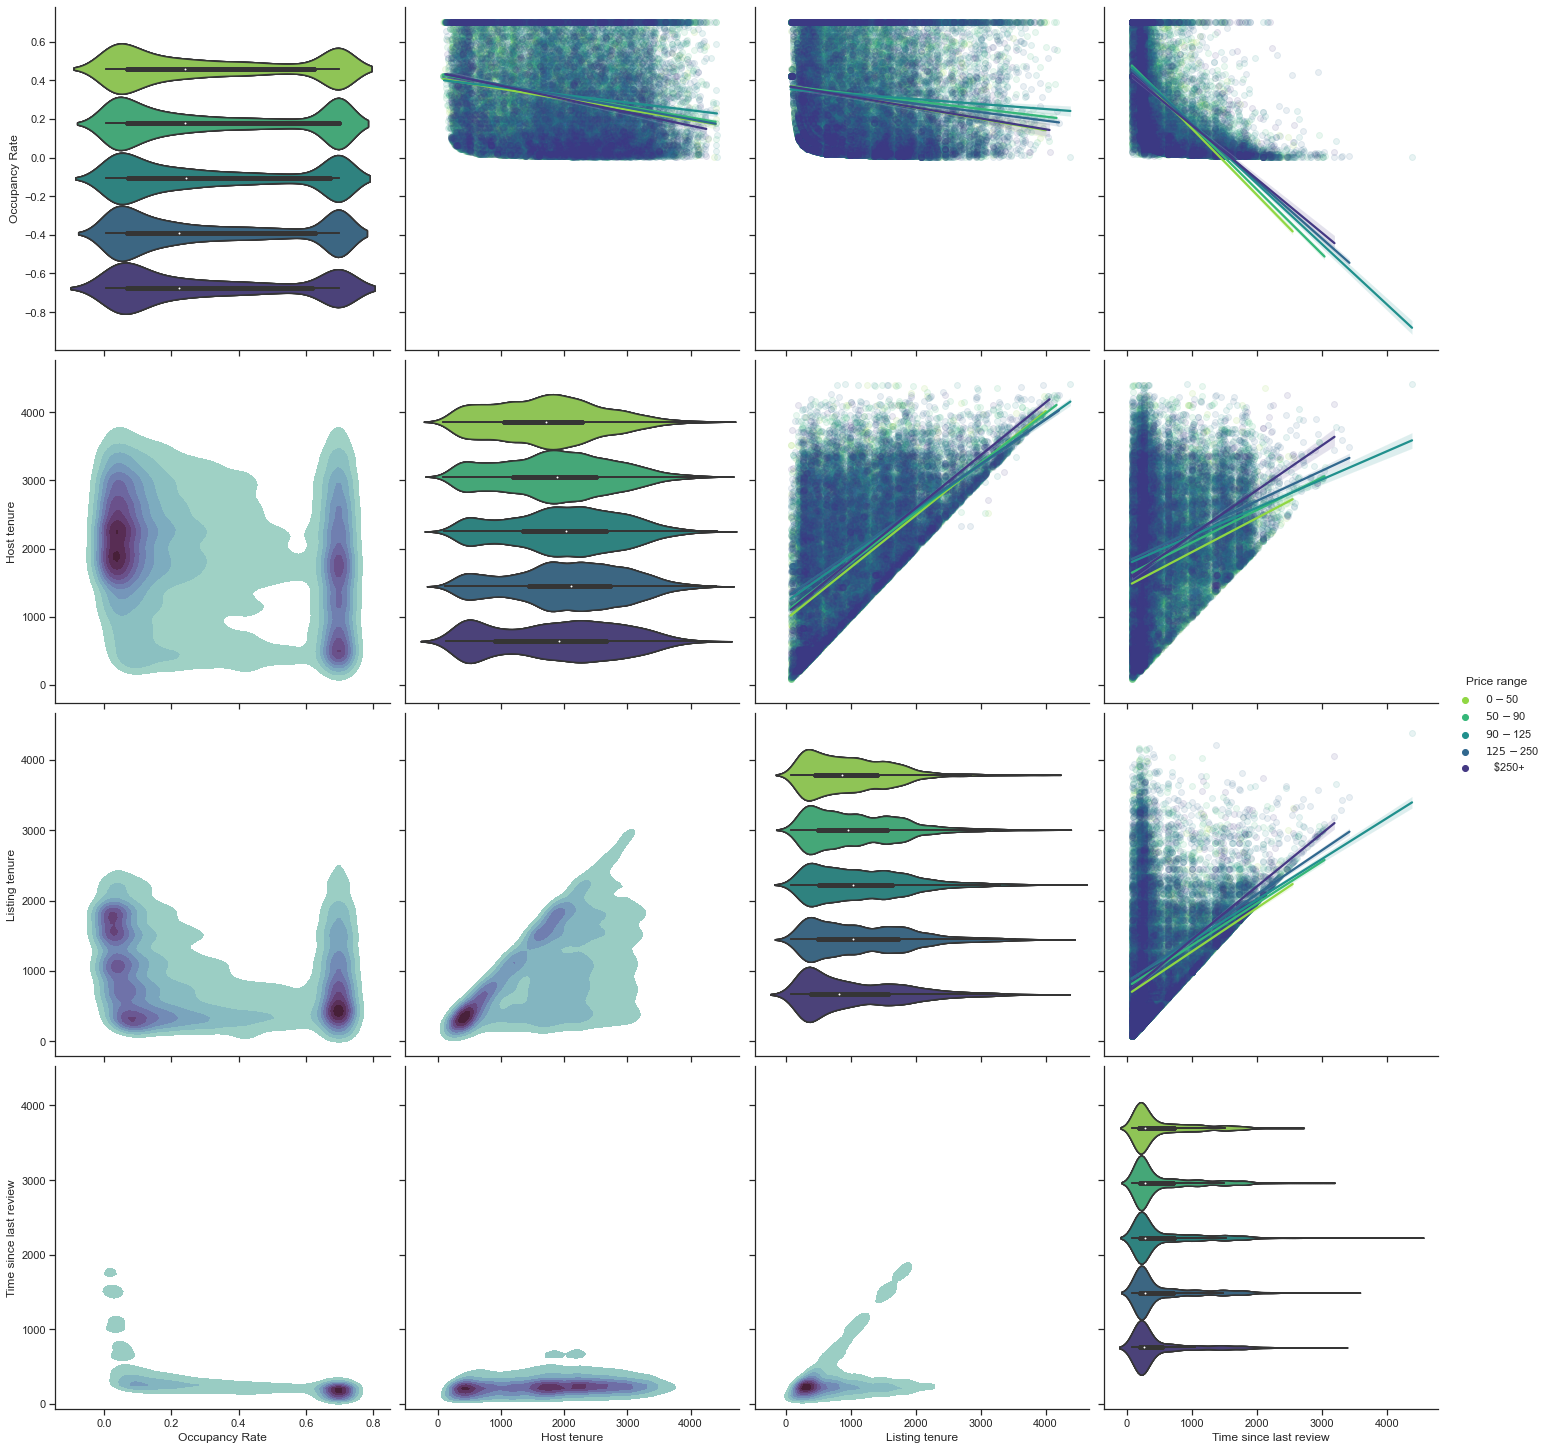

In [4]:
# Plot the selected attributes again and color code the points by position
data = listings_07_20[[
    "price_range",
    "occupancy_rate",
    "host_tenure",
    "listing_tenure",
    "listing_recency"
]].dropna()

data["host_tenure"] = data["host_tenure"].dt.days
data["listing_tenure"] = data["listing_tenure"].dt.days
data["listing_recency"] = data["listing_recency"].dt.days

data.rename(columns={
    "price_range": "Price range",
    "occupancy_rate": "Occupancy Rate",
    "host_tenure": "Host tenure",
    "listing_tenure": "Listing tenure",
    "listing_recency": "Time since last review",
}, inplace=True)

CMAP = sns.cubehelix_palette(8, start=1, rot=-.75, as_cmap=True)
PALETTE = "viridis_r"

def _kde_no_hue(x, y, **kwargs):
    sns.kdeplot(
        data[x.name], 
        data[y.name], 
        shade=True, 
        shade_lowest=False,
        cmap=CMAP
    )
    
def _violin_split(_x, iter_cols=None, **kwargs):
    column = next(iter_cols)
    violin_data = data.copy()
    violin_data[""] = ""
    sns.violinplot(
        y="",
        x=column,
        hue="Price range",
        palette=PALETTE,
        data=violin_data,
    )
    
g = sns.PairGrid(
    data, 
    hue="Price range", 
    palette=PALETTE, 
    dropna=True, 
    height=5
)
g = g.map_upper(sns.regplot, scatter_kws={"alpha": 0.1})
columns = iter(itertools.chain(*([v]*data["Price range"].nunique() for v in g.y_vars)))
g = g.map_diag(_violin_split, iter_cols=columns)
g = g.map_lower(_kde_no_hue)
g = g.add_legend()
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
plt.show(g)

#### Interpretation

We are using a scatter plot matrix visualisation tool to explore relationship between some of the attributes in the AirBnb data. Also, considering that the previous figures featured static data, we would like to add a time-related angle to our investigation.

We are interested to see whether a combination of such attributes as `Occupancy Rate`, `Host tenure` (how long the host has been present on AirBnb, in days), `Listing tenure` (how long a listing has been featured on AirBnb), and `Time since last review` (number of days since last review) can unveil any interesting patterns.

The occupancy rate distribution shows a distinct - almost polar - shape, shared by properties across all price ranges. This demonstrates the split between the hosts sharing their own homes and the 'professional operators', who rent out accommodations almost excusively dedicated to AirBnb. We can see that the latter category of listings has significant presense, which highlights the controversy around AirBnb model in NYC (potential abuse of house-sharing model by operators of illigal hotels).

Interestingly, we see that the peak of new enrollings into the AirBnb community seems to have passed for the 'regular' hosts (with the highest density of low-occupancy listings attributed to hosts who have been present on the platform for about 5 years. That is not the case for the 'professional' hosts, for whom the concept continues to be attractive (high density of new hosts running high-occupancy properties). From the host tenure violin plot we can see that relatively large number recently joined hosts of high-prices properties. Owners of mid-priced homes seem to have been the early adopters, though number of new recruites has been mostly reducing since the peak about 5 years ago.

The picture changes somewhat when we look at listings' instead of hosts' tenure, as 'age' of the listings is significantly lower for both occupancy categories. Our hypothesis is that hosts change their listings from time to time, either as a result of a physical upgrade of a property or simply as a 'facelift' to the listing itself. This is supported by the 'listing tenure vs host tenure' scatterplot, where the tenures are mostly equal, though in some cases host tenure is longer than listing's. 

As expected, we see that high-occupancy listings have most very recent reviews, which is likely to be very important the hosts.

To the right of the diagonal we added regression lines to the scatter plots. The relationships generally follow the same trend across all price ranges, with the top-end listing showing the largest deviations from the rest. 

#### Comments on the visualisation

###### What?

- **Datasets:**
    - **Dataset Types:** Table
    - **Dataset Availability:** Static

- **Attributes:**
    - `Price range`: ordinal, sequential
    - `Occupancy Rate`: quantitative sequential
    - `Host tenure`: quantitative sequential
    - `Listing tenure`: quantitative sequential
    - `Listing recency`: quantitative sequential

###### Why?

- **Actions:**
    - **Analyze:** Consume > Discover
    - **Search:** Lookup, Locate
    - **Query:** Identify, Compare, Summarise
    
- **Targets:**
    - **All Data:** Trends, Features
    - **Attributes:** One > Distribution; Many > Dependency, Correlation

###### How?

- **Encode:**
    - **Arrange:** Express, Separate, Order, Align
    - **Map:** Color > Hue, Luminance/Saturation; Color Map > Sequential
    
- **Reduce:**
    - **Filter:** reduced number of attributes
    - **Aggregate:** Groupby(`price`)
    
- **Facet:**
    - **Juxtapose**

We use a **scatter plot matrix** format to review and compare multiple attribute combinations. 

At the feature engineering stage we calculated a number of new attributes, including `Host tenure` (how long the host has been present on AirBnb, in days), `Listing tenure` (how long a listing has been featured on AirBnb), and `Listing recency` (number of days since last review). These attributes were desingned to let us explore evolution in the NYC AirBnb community. 

We build up on our analysis if different price ranges, and thus continue to use the same colour map. We used **'viridis_r' colour map** as it is a perceptually uniform sequential map, yet it uses different hues which helps the user identify differences between categories better than monochrome maps. It is also colorblind friendly.

Taking advantage of the matrix design, we use all types of marks (points, areas and lines) in this visualisation. The **points** repesent listings, **areas** encode density distributions and **lines** show regression trends.

The density heatmap proved to be a very effective idiom to show the distribution and relationship between attributes of a relatively large dataset. Justaposing the multiple, yet related plots together allowed for seamless comparison and the relationships and trends within indivudual variables.